<a href="https://colab.research.google.com/github/memona-asim/Dice-Roller/blob/main/CICDs2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import os

# Path to the folder containing the CSV files
file_path = '/content/dataset'  # Adjust this to the correct path

# List all CSV files in the directory
csv_files = [f for f in os.listdir(file_path) if f.endswith('.csv')]

# Initialize an empty DataFrame to store all benign traffic
benign_traffic = pd.DataFrame()

# Track the number of rows processed per file
file_summary = {}

# Loop through each file, read it, filter out benign traffic and append it
for file in csv_files:
    # Load the dataset
    full_path = os.path.join(file_path, file)
    df = pd.read_csv(full_path)

    # Filter out benign traffic (assuming the 'Label' column indicates benign traffic as 'BENIGN')
    benign_data = df[df[' Label'] == 'BENIGN']  # Update this if your benign traffic label is different

    # Append to the benign_traffic DataFrame
    benign_traffic = pd.concat([benign_traffic, benign_data], ignore_index=True)

    # Save the number of rows processed for this file
    file_summary[file] = len(benign_data)

# Save the benign traffic to a new CSV file
benign_traffic.to_csv('/content/benign_traffic.csv', index=False)

# Print file summary
print("File Summary:")
for file, rows in file_summary.items():
    print(f"{file}: {rows} rows of benign traffic")

# Print the total number of rows in the benign traffic dataset
print(f"\nTotal number of rows in the benign traffic dataset: {len(benign_traffic)}")


File Summary:
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: 97718 rows of benign traffic
Wednesday-workingHours.pcap_ISCX.csv: 440031 rows of benign traffic
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: 288566 rows of benign traffic
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: 168186 rows of benign traffic
Tuesday-WorkingHours.pcap_ISCX.csv: 432074 rows of benign traffic
Friday-WorkingHours-Morning.pcap_ISCX.csv: 189067 rows of benign traffic
Monday-WorkingHours.pcap_ISCX.csv: 529918 rows of benign traffic
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: 127537 rows of benign traffic

Total number of rows in the benign traffic dataset: 2273097


In [4]:
# Drop rows with missing values
df = df.dropna()

# Convert non-numeric features to numeric if necessary
df = pd.get_dummies(df, drop_first=True)


In [5]:
import pandas as pd

# Load the benign traffic dataset
file_path = "benign_traffic.csv"  # Path to your file
benign_data = pd.read_csv(file_path)

# Display basic information
print(benign_data.info())
print(benign_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273097 entries, 0 to 2273096
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [6]:
# Print the columns of the dataset to check
print(benign_data.columns)

# Adjust column names (if needed)
benign_data.columns = benign_data.columns.str.strip()  # Clean column names

# Define the exact 23 relevant features you mentioned
relevant_features = [
    "Destination Port",
    "Flow Duration",
    "Total Fwd Packets",
    "Total Backward Packets",
    "Total Length of Fwd Packets",
    "Total Length of Bwd Packets",
    "Flow Bytes/s",
    "Flow Packets/s",
    "Fwd Packets/s",
    "Bwd Packets/s",
    "Fwd IAT Mean",
    "Bwd IAT Mean",
    "SYN Flag Count",
    "URG Flag Count",
    "FIN Flag Count",
    "Fwd IAT Std",
    "Bwd IAT Std",
    "Fwd Packet Length Mean",
    "Bwd Packet Length Mean"
]


# Filter only the available features from the dataset
filtered_data = benign_data[relevant_features]

# Save the filtered data to a new CSV file
filtered_data.to_csv("filtered_benign_features.csv", index=False)

print("Filtered features saved!")


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr().abs()

# Identify upper triangle of correlation matrix (use boolean mask)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
upper_corr_matrix = correlation_matrix * upper_triangle  # Apply mask to get the upper triangle

# Find features with correlation greater than 0.9
to_drop = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > 0.9)]

# Drop the highly correlated features
reduced_data = filtered_data.drop(columns=to_drop)

print(f"Removed features: {to_drop}")
print(f"Remaining features: {reduced_data.columns.tolist()}")


Removed features: ['Total Backward Packets', 'Total Length of Bwd Packets', 'Fwd Packets/s', 'Bwd IAT Mean']
Remaining features: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Flow Bytes/s', 'Flow Packets/s', 'Bwd Packets/s', 'Fwd IAT Mean', 'SYN Flag Count', 'URG Flag Count', 'FIN Flag Count', 'Fwd IAT Std', 'Bwd IAT Std', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check for infinite values and replace them with NaN
reduced_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values (NaN)
if reduced_data.isnull().values.any():
    # Replace NaN with the mean of each column (you could also use median or other strategies)
    reduced_data.fillna(reduced_data.mean(), inplace=True)

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_data = scaler.fit_transform(reduced_data)

# Convert scaled data back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=reduced_data.columns)

# Save the scaled data
scaled_data.to_csv("scaled_benign_features.csv", index=False)

print("Features scaled and saved!")


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'scaled_data' is the preprocessed dataset
X = scaled_data.drop(columns=["Label"])  # Features
y = scaled_data["Label"]  # Labels (Benign traffic, labeled as 1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")



Training data shape: (1818477, 15)
Test data shape: (454620, 15)


In [22]:
from sklearn.ensemble import IsolationForest

# Train the model on the benign training data (X_train)
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Make predictions on the test data (X_test)
y_pred = model.predict(X_test)


In [23]:
# Convert the predictions (1 = normal, 0 = anomaly)
y_pred = [0 if pred == -1 else 1 for pred in y_pred]


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9010

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95    454620

    accuracy                           0.90    454620
   macro avg       0.50      0.45      0.47    454620
weighted avg       1.00      0.90      0.95    454620


Confusion Matrix:
[[     0      0]
 [ 44987 409633]]


In [31]:
import numpy as np
import pandas as pd

# Load the benign traffic dataset
file_path = "/content/dataset/Tuesday-WorkingHours.pcap_ISCX.csv"  # Path to your file

attack_data = pd.read_csv(file_path)

# Adjust column names (if needed)
attack_data.columns = attack_data.columns.str.strip()  # Clean column names

# Define the exact 23 relevant features you mentioned
relevant_features = [
    "Destination Port",
    "Flow Duration",
    "Total Fwd Packets",
    "Total Backward Packets",
    "Total Length of Fwd Packets",
    "Total Length of Bwd Packets",
    "Flow Bytes/s",
    "Flow Packets/s",
    "Fwd Packets/s",
    "Bwd Packets/s",
    "Fwd IAT Mean",
    "Bwd IAT Mean",
    "SYN Flag Count",
    "URG Flag Count",
    "FIN Flag Count",
    "Fwd IAT Std",
    "Bwd IAT Std",
    "Fwd Packet Length Mean",
    "Bwd Packet Length Mean"
]


# Filter only the available features from the dataset
filtered_data = benign_data[relevant_features]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr().abs()

# Identify upper triangle of correlation matrix (use boolean mask)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
upper_corr_matrix = correlation_matrix * upper_triangle  # Apply mask to get the upper triangle

# Find features with correlation greater than 0.9
to_drop = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > 0.9)]

# Drop the highly correlated features
reduced_data = filtered_data.drop(columns=to_drop)

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check for infinite values and replace them with NaN
reduced_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values (NaN)
if reduced_data.isnull().values.any():
    # Replace NaN with the mean of each column (you could also use median or other strategies)
    reduced_data.fillna(reduced_data.mean(), inplace=True)

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_data = scaler.fit_transform(reduced_data)

# Convert scaled data back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=reduced_data.columns)


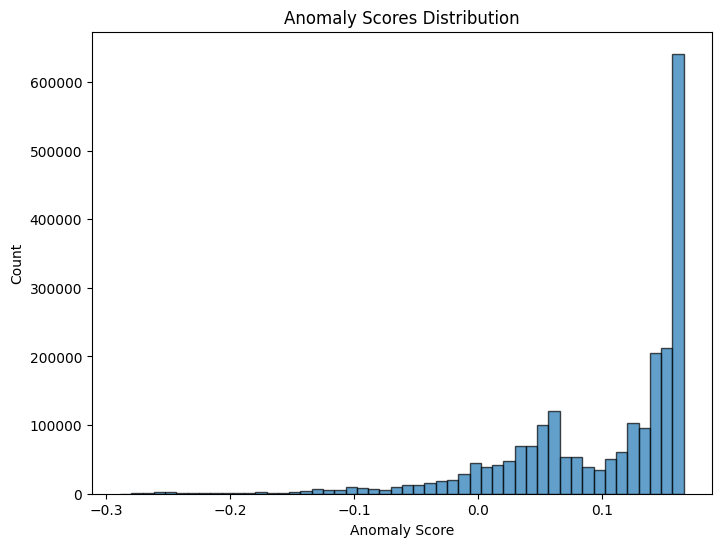

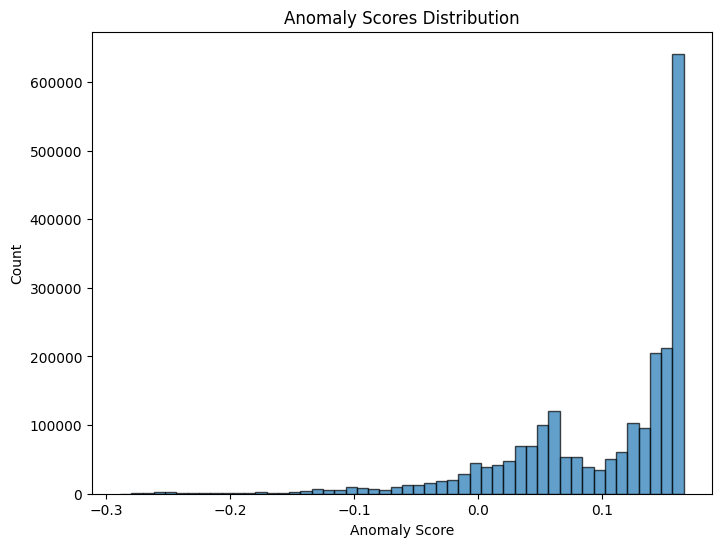

In [38]:
import matplotlib.pyplot as plt
# For example, using the decision function of Isolation Forest
anomaly_scores = model.decision_function(scaled_data)

# Plot the anomaly scores
plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores, bins=50, edgecolor='black', alpha=0.7)
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.show()
# For example, using the decision function of Isolation Forest
anomaly_scores = model.decision_function(scaled_data)

# Plot the anomaly scores
plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores, bins=50, edgecolor='black', alpha=0.7)
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.show()


In [52]:
# Predict anomalies using the trained model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train)

predictions_attack = model.predict(scaled_data)

# Convert predictions: -1 for anomaly, 1 for normal
predictions_attack = [0 if label == -1 else 1 for label in predictions_attack]

# Print a portion of the predictions
print(predictions_attack[:20])  # First 1

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [1]:
print(attack_data.head(20))

NameError: name 'attack_data' is not defined